In [1]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns
pd.options.display.max_columns = None

In [2]:
#load the csv file as a pandas dataframe
#ISO-8859-1
tweet = pd.read_csv('facebook_comment_2k7.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet.head()

,Unnamed: 0,id,text,label
0,0,3113b477-4ea3-4c3f-82d7-6ae6b8c12a3b,Noi cho biet k rãnh viet voi loai ng nhu chị c...,['harassment']
1,1,de5cf256-3879-413d-9e33-2c3be7e2e0c1,-Giải ngân cực nhanh\n-mức vay lên đến 15tr\n👉...,['dangerous_content']
2,2,975a369c-acc2-487c-84dd-64a4764203cf,Thủ tục đơn giản đăng ký khoản vay giải ngân l...,['dangerous_content']
3,3,45aa9b39-c58a-4c91-941a-fe6373d009f5,săn mãi con đen v5 cả tối k đc an ủi đc con be...,['normal']
4,4,99f6d7e6-b1c0-4849-9430-c60137737ead,zalo 0375841653 ae nào mua kết bạn zalo đặt hà...,['dangerous_content']


In [3]:
#get rid of the identifier number of the tweet
tweet.drop('id',axis=1,inplace=True)

In [4]:
#view one of the tweets randomly
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['text']

1947


'Linh chọn cái nào dài trên gối tí sẽ trẻ và khoe chân hơn ăn gian chiu cao hơn á'

In [5]:
#create a copy of the original data to work with
df = tweet.copy()

In [6]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [7]:
df['text'] = df['text'].apply(simplify)

<a id='2-4'></a>
### _Tokenize using tweet tokenizer_

In [12]:
#test on a sample text
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [13]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['text'] = df['text'].apply(tokenizer.tokenize)

In [14]:
#view the tokenized tweets
df.head(3)

,Unnamed: 0,text,label
0,0,"[Noi, cho, biet, k, ranh, viet, voi, loai, ng,...",['harassment']
1,1,"[-, Giai, ngan, cuc, nhanh, -, muc, vay, len, ...",['dangerous_content']
2,2,"[Thu, tuc, on, gian, ang, ky, khoan, vay, giai...",['dangerous_content']


<a id='2-5'></a>
### _Remove Stopwords_
_Append more words to be removed from the text - example rt and amp which occur very frequently_

In [15]:
# import nltk

# # Tải danh sách stop words cho Tiếng Việt từ gói nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# # Lấy danh sách stop words cho Tiếng Việt
# stop_words_vietnamese = set(stopwords.words('vietnamese'))


import requests

# Tải danh sách stop words cho Tiếng Việt từ nguồn trực tuyến
stopwords_url = "https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt"
response = requests.get(stopwords_url)
stop_words_vietnamese = response.text.splitlines()

#Thêm stop words tiếng việt
additional_list = ['bằng','cái','rồi','đi','mình']

# for word in additional_list:
#     stop_words_vietnamese.add(word)

print(stop_words_vietnamese)



# import nltk
# from nltk.corpus import stopwords

# # Tải danh sách stop words cho Tiếng Việt từ gói nltk
# nltk.download('stopwords')

# # Lấy danh sách stop words cho Tiếng Việt
# stop_words_vietnamese = set(stopwords.words('vietnamese'))

# #Thêm stop words tiếng việt
# additional_list = ['bằng', 'cái', 'rồi', 'đi', 'mình']
# stop_words_vietnamese.update(additional_list)

# # In ra danh sách stop words sau khi thêm
# print(stop_words_vietnamese)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [16]:
stop_words_vietnamese[-10:]

['ở được', 'ủa', 'ứ hự', 'ứ ừ', 'ừ', 'ừ nhé', 'ừ thì', 'ừ ào', 'ừ ừ', 'ử']

In [17]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words_vietnamese]
    return clean_text

In [18]:
#remove the stop words from the tweets
df['text'] = df['text'].apply(remove_stopwords)

In [19]:
df['text'].head()

0    [Noi, biet, k, ranh, viet, voi, loai, ng, nhu,...
1    [-, Giai, ngan, cuc, -, muc, vay, len, en, 15t...
2    [Thu, tuc, on, gian, ang, ky, khoan, vay, giai...
3    [san, mai, en, v5, ca, toi, k, c, an, ui, c, b...
4    [zalo, 03758416, 53, ae, nao, mua, ket, ban, z...
Name: text, dtype: object

<a id='2-6'></a>
### _Spelling corrections_

In [20]:
#apply spelling correction on a sample text
from textblob import TextBlob
sample = 'amazng man you did it finallyy'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

amazing man you did it finally


In [21]:
#textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text


<a id='2-7'></a>
### _Remove # symbols while retaining the text_

In [22]:
#try tremoving # symbols from a sample text
sample = '#winner #machine i am learning'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'winner machine i am learning'

In [23]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)

In [24]:
df['text'] = df['text'].apply(remove_hashsymbols)

In [25]:
df.head(3)

,Unnamed: 0,text,label
0,0,"[Noi, biet, k, ranh, viet, voi, loai, ng, nhu,...",['harassment']
1,1,"[-, Giai, ngan, cuc, -, muc, vay, len, en, 15t...",['dangerous_content']
2,2,"[Thu, tuc, on, gian, ang, ky, khoan, vay, giai...",['dangerous_content']


In [26]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments:
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]

    return new_text


In [27]:
df['text'] = df['text'].apply(rem_shortwords)

In [28]:
df.head(2)

,Unnamed: 0,text,label
0,0,Noi biet k ranh viet voi loai ng nhu chi cung ...,['harassment']
1,1,- Giai ngan cuc - muc vay len en 15tr Duyet tu...,['dangerous_content']


In [29]:
df['text'] = df['text'].apply(tokenizer.tokenize)

In [30]:
df.head(3)

,Unnamed: 0,text,label
0,0,"[Noi, biet, k, ranh, viet, voi, loai, ng, nhu,...",['harassment']
1,1,"[-, Giai, ngan, cuc, -, muc, vay, len, en, 15t...",['dangerous_content']
2,2,"[Thu, tuc, on, gian, ang, ky, khoan, vay, giai...",['dangerous_content']


<a id='2-9'></a>
### _Remove digits_

In [31]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)

In [32]:
df['text'] = df['text'].apply(rem_digits)

In [33]:
df['text'] = df['text'].apply(tokenizer.tokenize)

In [34]:
df.head()

,Unnamed: 0,text,label
0,0,"[Noi, biet, k, ranh, viet, voi, loai, ng, nhu,...",['harassment']
1,1,"[-, Giai, ngan, cuc, -, muc, vay, len, en, tr,...",['dangerous_content']
2,2,"[Thu, tuc, on, gian, ang, ky, khoan, vay, giai...",['dangerous_content']
3,3,"[san, mai, en, v, ca, toi, k, c, an, ui, c, be...",['normal']
4,4,"[zalo, ae, nao, mua, ket, ban, zalo, at, hang,...",['dangerous_content']


<a id='2-10'></a>
### _Remove special characters_


In [35]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [36]:
#remove the non alpha numeric characters from the tweet tokens
df['text'] = df['text'].apply(rem_nonalpha)

In [37]:
#plot of the count of hate and non hate tweet
# sns.countplot(df['label'])
# plt.title('Count of Hate vs Non Hate Tweet')
# plt.grid()
# plt.show()

In [38]:
from collections import Counter
results = Counter()
df['text'].apply(results.update)
#print the top 10 most common terms in the tweet
print(results.most_common(10))

[('co', 870), ('a', 846), ('e', 719), ('ban', 614), ('chi', 566), ('la', 533), ('cung', 484), ('o', 466), ('ma', 464), ('vay', 463)]


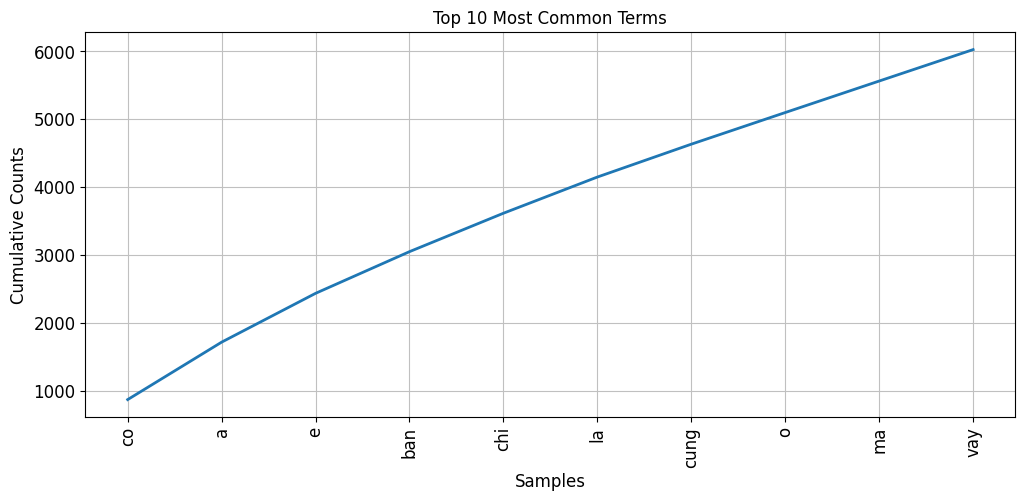

In [39]:
#plot the cumulative frequency of the top 10 most common tokens
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

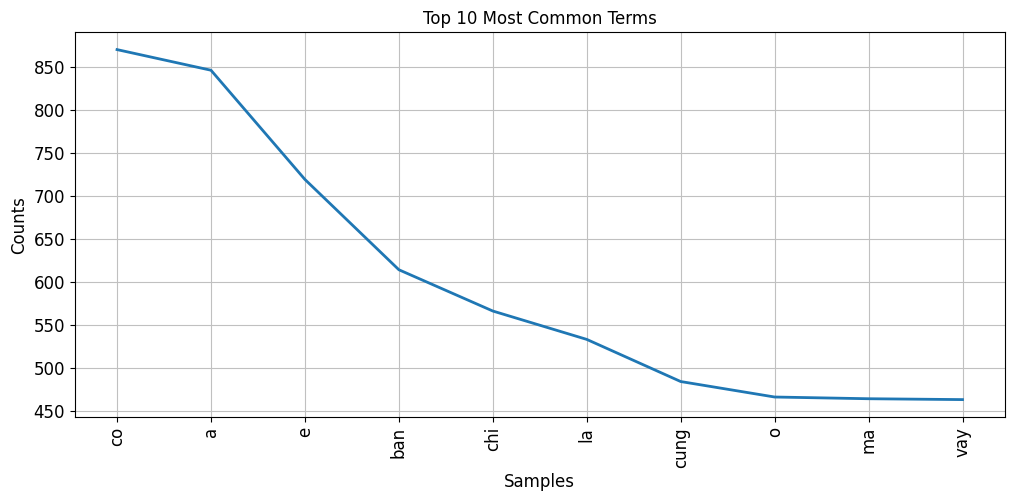

In [40]:
#plot the frequency of the top 10 most common tokens
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

_Love is the most frequently used word followed by day, happy etc. This is expected as there are more non hate tweets than hate tweets in the dataset_

In [41]:
df.head()

,Unnamed: 0,text,label
0,0,"[Noi, biet, k, ranh, viet, voi, loai, ng, nhu,...",['harassment']
1,1,"[Giai, ngan, cuc, muc, vay, len, en, tr, Duyet...",['dangerous_content']
2,2,"[Thu, tuc, on, gian, ang, ky, khoan, vay, giai...",['dangerous_content']
3,3,"[san, mai, en, v, ca, toi, k, c, an, ui, c, be...",['normal']
4,4,"[zalo, ae, nao, mua, ket, ban, zalo, at, hang,...",['dangerous_content']


In [42]:
#check for the null values
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [43]:
#join the tokens back to form the string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [44]:
#check the top rows
df.head(3)

,Unnamed: 0,text,label
0,0,Noi biet k ranh viet voi loai ng nhu chi cung ...,['harassment']
1,1,Giai ngan cuc muc vay len en tr Duyet tu ong c...,['dangerous_content']
2,2,Thu tuc on gian ang ky khoan vay giai ngan lie...,['dangerous_content']


In [45]:
#split the data into input X and output y
X = df['text']
y = df['label']

In [47]:
# #split the data
# from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Phân chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=seed)

# Khởi tạo mô hình TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Chuyển đổi dữ liệu văn bản thành các vector số
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Kiểm tra số lượng mẫu trong X_train_tfidf và y_train
print(X_train_tfidf.shape, y_train.shape)

(2160, 2523) (2160,)


In [48]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
#instantiate the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

In [50]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [51]:
#check the shape
X_train.shape, X_test.shape

((2160, 2523), (540, 2523))

In [52]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
print(X_train.shape, y_train.shape)

(2160, 2523) (2160,)


In [66]:
# #instantiate the models with default hyper-parameters
# clf = LogisticRegression()
# clf.fit(X_train,y_train)
# train_predictions = clf.predict(X_train)
# test_predictions = clf.predict(X_test)

from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
logistic_regression_model = LogisticRegression()

# Huấn luyện mô hình Logistic Regression trên dữ liệu TF-IDF
logistic_regression_model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra bằng mô hình Logistic Regression
train_predictions = logistic_regression_model.predict(X_train_tfidf)
test_predictions = logistic_regression_model.predict(X_test_tfidf)



["['hate_speech']" "['normal']" "['normal']" ... "['normal']"
 "['hate_speech']" "['normal']"]
["['dangerous_content']" "['hate_speech']" "['normal']" "['hate_speech']"
 "['normal']" "['normal']" "['hate_speech']" "['hate_speech']"
 "['normal']" "['normal']" "['normal']" "['normal']"
 "['dangerous_content']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['normal']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['normal']" "['normal']" "['normal']"
 "['dangerous_content']" "['normal']" "['sexaully_explixit']"
 "['dangerous_content']" "['normal']" "['hate_speech']" "['normal']"
 "['normal']" "['normal']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['normal']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['sexaully_explixit']" "['normal']" "['normal']"
 "['dangerous_content']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['normal']" "['normal']" "['hate_speech']"
 "['sexaully_explixit']" "['normal']" "['normal']" "['normal']"
 "['normal']" "['no

<a id='4-4'></a>
### _Model evaluation_



In [54]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.80463
Accuracy Score on test set 0.73519


_Accuracy is never a good metric for an imbalanced dataset as in this case. This can be highighted using the f1 score. A low f1-score for a label indicate poor performance of the model._

In [56]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


                                            precision    recall  f1-score   support

                     ['dangerous_content']       1.00      0.81      0.90       229
             ['harassment', 'hate_speech']       0.00      0.00      0.00        24
       ['harassment', 'sexaully_explixit']       0.00      0.00      0.00         2
                            ['harassment']       0.88      0.24      0.38       124
      ['hate_speech', 'dangerous_content']       0.00      0.00      0.00         1
             ['hate_speech', 'harassment']       0.00      0.00      0.00        32
      ['hate_speech', 'sexaully_explixit']       0.00      0.00      0.00         2
                           ['hate_speech']       0.71      0.65      0.68       308
                                ['normal']       0.79      1.00      0.88      1269
['sexaully_explixit', 'dangerous_content']       0.00      0.00      0.00         1
      ['sexaully_explixit', 'hate_spee

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


                                      precision    recall  f1-score   support

               ['dangerous_content']       0.98      0.80      0.88        50
       ['harassment', 'hate_speech']       0.00      0.00      0.00         9
 ['harassment', 'sexaully_explixit']       0.00      0.00      0.00         1
                      ['harassment']       0.83      0.16      0.27        31
       ['hate_speech', 'harassment']       0.00      0.00      0.00        13
                     ['hate_speech']       0.43      0.42      0.42        62
                          ['normal']       0.75      0.98      0.85       326
['sexaully_explixit', 'hate_speech']       0.00      0.00      0.00         2
               ['sexaully_explixit']       1.00      0.17      0.30        46

                            accuracy                           0.74       540
                           macro avg       0.44      0.28      0.30       540
                        we

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# Nhập đoạn văn bản từ người dùng
text = input("Nhập đoạn văn bản: ")

# Chuyển đổi đoạn văn bản thành vector TF-IDF
text_tfidf = tfidf_vectorizer.transform([text])

# Dự đoán xem đoạn văn bản có phải là hate speech hay không
prediction = logistic_regression_model.predict(text_tfidf)

print(prediction[0])

if prediction[0] == 'hate_speech':
    print("Đây là hate speech.")
else:
    print("Đây không phải là hate speech.")

Nhập đoạn văn bản: Riết rồi thấy ông này xàm vc ra. Game rác vl cứ quan trọng hoá như đúng rồi. Đợi liên minh mobile ra xem ai còn chơi game này nữa ko.!
['normal']
Đây không phải là hate speech.


In [77]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các giá trị cho các siêu tham số cần điều chỉnh
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Khởi tạo mô hình Logistic Regression
logistic_regression_model = LogisticRegression()

# Khởi tạo tìm kiếm lưới
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5)

# Huấn luyện mô hình trên dữ liệu huấn luyện
grid_search.fit(X_train_tfidf, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Dự đoán trên tập huấn luyện và tập kiểm tra bằng mô hình đã điều chỉnh
train_predictions = grid_search.predict(X_train_tfidf)
test_predictions = grid_search.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Best parameters found:  {'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Lấy mô hình tốt nhất từ grid search
best_model = grid_search.best_estimator_

# Sử dụng mô hình tốt nhất để dự đoán trên tập huấn luyện và tập kiểm tra
train_predictions = best_model.predict(X_train_tfidf)
test_predictions = best_model.predict(X_test_tfidf)

In [79]:
# Báo cáo phân loại cho tập huấn luyện
print("Classification Report Training set:")
print(classification_report(y_train, train_predictions))

# Báo cáo phân loại cho tập kiểm tra
print("\nClassification Report Testing set:")
print(classification_report(y_test, test_predictions))

Classification Report Training set:
                                            precision    recall  f1-score   support

                     ['dangerous_content']       1.00      1.00      1.00       229
             ['harassment', 'hate_speech']       1.00      0.67      0.80        24
       ['harassment', 'sexaully_explixit']       1.00      1.00      1.00         2
                            ['harassment']       0.97      0.92      0.95       124
      ['hate_speech', 'dangerous_content']       0.00      0.00      0.00         1
             ['hate_speech', 'harassment']       0.93      0.84      0.89        32
      ['hate_speech', 'sexaully_explixit']       1.00      1.00      1.00         2
                           ['hate_speech']       0.95      0.98      0.96       308
                                ['normal']       0.99      1.00      0.99      1269
['sexaully_explixit', 'dangerous_content']       1.00      1.00      1.00         1
      ['sexaully_explixit', 'hate_speec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [98]:
from sklearn.linear_model import LogisticRegression

# Nhập đoạn văn bản từ người dùng
text = input("Nhập đoạn văn bản: ")

# Chuyển đổi đoạn văn bản thành vector TF-IDF
text_tfidf = tfidf_vectorizer.transform([text])

# Khởi tạo mô hình Logistic Regression
logistic_regression_model = LogisticRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
logistic_regression_model.fit(X_train_tfidf, y_train)

# Dự đoán xem đoạn văn bản có phải là hate speech hay không
prediction = logistic_regression_model.predict(text_tfidf)

print(prediction[0])

if 'hate_speech' in prediction[0]:
    print("Hate speech")
else:
    print("Non")

Nhập đoạn văn bản: No’ dang tinh’ suc. Cac. Muh no het’ suc’ de^~ suc. Chu*’ gi
['hate_speech']
Hate speech.
